In [5]:
import shutil
import tensorflow as tf
import 
import numpy as np
from PIL import Image

NEW_DATA = r'C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all' #path to folder with new images from New Zealand station = mt_5727_2019_all
MODEL_NAME = 'B32,64,128.keras'
IMG_SIZE = 256 #same as with training
CATEGORIES = ['0_cloudy', '1_partly', '2_clear']  

# load model
model = tf.keras.models.load_model(MODEL_NAME)
print("Model načítaný.")

# image preparation 
def prepare_image(path_to_image, img_size):
    img = Image.open(path_to_image).convert('L') #grayscale image

##obrazok orezeme tak ako sme orezovali pri trenovani, tieto obrazky vsak maju 550x550 a nie 682x682 preto ak chcem aby boli rovnako velke ich orezeme tak aby mali potom velkost 482x482 cize 34pixelov z kazd. strany
    
    img = img.crop((34, 34, 516, 516)) #orezanie 
    img = img.resize((img_size, img_size)) #size change
    img_array = np.array(img, dtype=np.float32) / 255.0 #normalization to 0,1
    img_array = np.expand_dims(img_array, axis=-1) #new dimension for color
    img_array = np.expand_dims(img_array, axis=0) #new dimension for batch because model expects in (batch_size, height, width, channels)
    return img_array

#prediction and sorting
for fname in os.listdir(NEW_DATA):
    if fname.lower().endswith(('.png')):
        src_path = os.path.join(NEW_DATA, fname)
        try:
            input_array = prepare_image(src_path, IMG_SIZE)
            prediction = model.predict(input_array, verbose=0) #verbose = 0 nech nevypisuje mi na 2x ze predikuje a potom kopiruje
            predicted_class = np.argmax(prediction)

            # final folder by prediction
            dest_dir = os.path.join(NEW_DATA, f'pred_{CATEGORIES[predicted_class]}')
            os.makedirs(dest_dir, exist_ok=True)

            # Copy or move file
            shutil.copy(src_path, os.path.join(dest_dir, fname)) #use shutil.copy if we want to copy or use shutil.move to just move
            print(f'{fname} → presunutý do {dest_dir}')

        except Exception as e:
            print(f'Chyba pri spracovaní {fname}: {e}')


Model načítaný.
mt-5727-20190101-101301-120.png → presunutý do C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all\pred_1_partly
mt-5727-20190101-105247-120.png → presunutý do C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all\pred_0_cloudy
mt-5727-20190101-113232-120.png → presunutý do C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all\pred_1_partly
mt-5727-20190101-121218-120.png → presunutý do C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all\pred_1_partly
mt-5727-20190101-125203-120.png → presunutý do C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all\pred_0_cloudy
mt-5727-20190101-133149-120.png → presunutý do C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all\pr

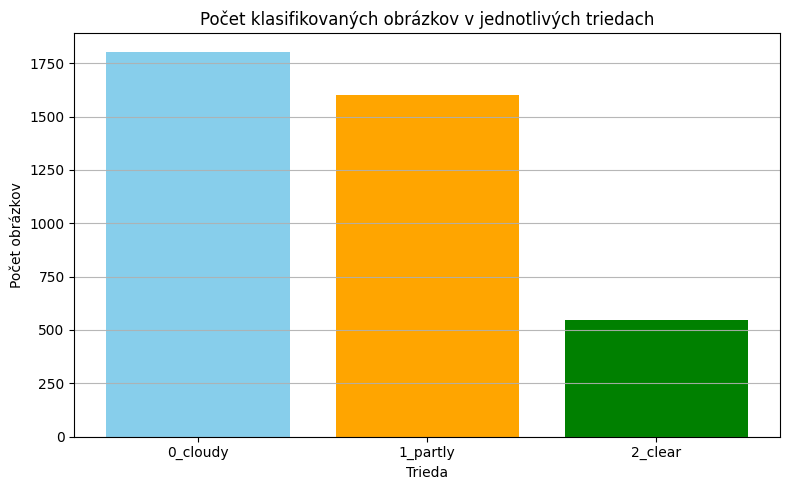

In [6]:
import os
import matplotlib.pyplot as plt

CATEGORIES = ['0_cloudy', '1_partly', '2_clear']
NEW_DATA = r'C:\Users\Lukas-novy-pc\Downloads\BU_data_training_sample\BU_data_training_sample\Hotove\mt_5727_2019_all'

counts = []
for cat in CATEGORIES:
    folder = os.path.join(NEW_DATA, f'pred_{cat}')
    num_files = len([f for f in os.listdir(folder) if f.lower().endswith('.png')]) if os.path.exists(folder) else 0
    counts.append(num_files)

# graf
plt.figure(figsize=(8, 5))
plt.bar(CATEGORIES, counts, color=['skyblue', 'orange', 'green'])
plt.title("Počet klasifikovaných obrázkov v jednotlivých triedach")
plt.xlabel('Trieda')
plt.ylabel('Počet obrázkov')
plt.grid(axis='y', alpha=0.9)
plt.tight_layout()
plt.savefig("nasadenie_graf.png", dpi=200, bbox_inches='tight')
plt.show()
